In [1]:
!pip install tensorflow keras -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,MaxPool2D,Dropout,Lambda
from tensorflow.keras.utils import plot_model

In [3]:
def base_network(inp):
  conv1 = Conv2D(64,(3,3),activation='relu')(inp)
  pool1 = MaxPool2D((2,2))(conv1)
  conv2 = Conv2D(128,(3,3),activation='relu')(pool1)
  pool2 = MaxPool2D((2,2))(conv2)
  flatten = Flatten()(pool2)
  dense1 = Dense(128,activation='relu')(flatten)
  dense2 = Dense(128,activation='relu')(dense1)
  return dense2

input_shape = (32,32,3)

In [4]:
inp1 = Input(shape=input_shape)
inp2 = Input(shape=input_shape)

out1 = base_network(inp1)
out2 = base_network(inp2)

In [5]:
euc_distance = Lambda(lambda tensors:tf.abs(tensors[0] - tensors[1]))([out1,out2])

output = Dense(1,activation='sigmoid')(euc_distance)

siamese_model = Model(inputs=[inp1,inp2],outputs=output)

siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
siamese_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 30, 30, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 30, 30, 64)     │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 15, 15, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 15, 15, 64)     │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 13, 13, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 13, 13, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 6, 6, 128)      │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 6, 128)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 4608)           │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 4608)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        589,952 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        589,952 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         16,512 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         16,512 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ dense_1[0][0],         │
│                      

 Total params: 1,364,353 (5.20 MB)

 Trainable params: 1,364,353 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

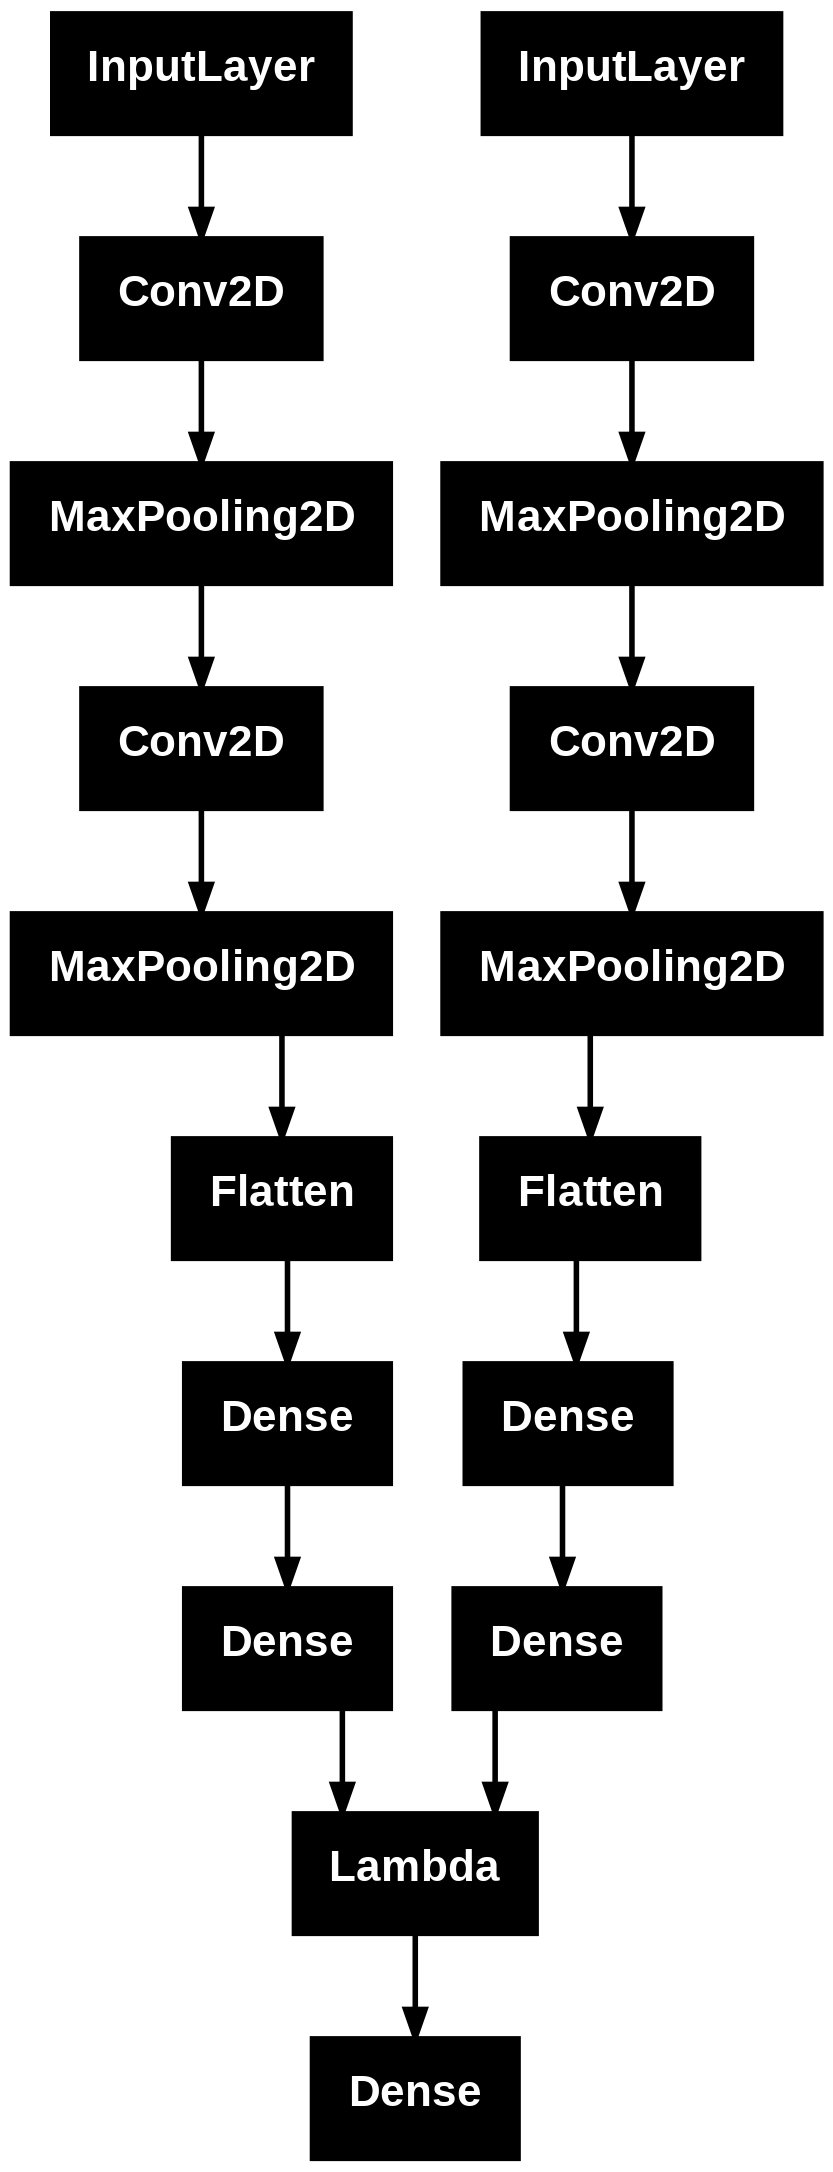

In [7]:
plot_model(siamese_model)

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical format
y_train = y_train.flatten()
y_test = y_test.flatten()

# Input shape for CIFAR-10
input_shape = (32, 32, 3)


def create_pairs(images, labels):
    """Create positive and negative pairs of images."""
    pairs = []
    labels_out = []
    num_classes = len(np.unique(labels))
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    for idx1 in range(len(images)):
        # Get the current image and its label
        img1 = images[idx1]
        label1 = labels[idx1]

        # Positive pair (same class)
        idx2 = np.random.choice(class_indices[label1])
        img2 = images[idx2]
        pairs.append([img1, img2])
        labels_out.append(1)

        # Negative pair (different class)
        label2 = (label1 + np.random.randint(1, num_classes)) % num_classes
        idx2 = np.random.choice(class_indices[label2])
        img2 = images[idx2]
        pairs.append([img1, img2])
        labels_out.append(0)

    return np.array(pairs), np.array(labels_out)

# Create training and testing pairs
train_pairs, train_labels = create_pairs(x_train, y_train)
test_pairs, test_labels = create_pairs(x_test, y_test)

# Separate pairs into two inputs
x1_train = train_pairs[:, 0]
x2_train = train_pairs[:, 1]
x1_test = test_pairs[:, 0]
x2_test = test_pairs[:, 1]

# Train the model


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
siamese_model.fit([x1_train, x2_train], train_labels,
                  batch_size=128,
                  epochs=10,
                  validation_data=([x1_test, x2_test], test_labels))

# Evaluate the model
test_loss, test_accuracy = siamese_model.evaluate([x1_test, x2_test], test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.4981 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5019 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5018 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4977 - loss: 0.6932 - 